<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [17]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [12]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")
print(df.info())
print(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65457 entries, 0 to 65456
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   

                                           EdLevel  \
0                        Primary/elementary school   
1     Bachelor’s de

## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [10]:
## Write your code here
duplicate_rows_count = df.duplicated().sum()
duplicate_rows = df[df.duplicated()]
print("前几个重复行:")
print(duplicate_rows.head().to_csv(sep='\t', na_rep='nan'))
print("重复行的数量:", duplicate_rows_count)

前几个重复行:
	ResponseId	MainBranch	Age	Employment	RemoteWork	Check	CodingActivities	EdLevel	LearnCode	LearnCodeOnline	TechDoc	YearsCode	YearsCodePro	DevType	OrgSize	PurchaseInfluence	BuyNewTool	BuildvsBuy	TechEndorse	Country	Currency	CompTotal	LanguageHaveWorkedWith	LanguageWantToWorkWith	LanguageAdmired	DatabaseHaveWorkedWith	DatabaseWantToWorkWith	DatabaseAdmired	PlatformHaveWorkedWith	PlatformWantToWorkWith	PlatformAdmired	WebframeHaveWorkedWith	WebframeWantToWorkWith	WebframeAdmired	EmbeddedHaveWorkedWith	EmbeddedWantToWorkWith	EmbeddedAdmired	MiscTechHaveWorkedWith	MiscTechWantToWorkWith	MiscTechAdmired	ToolsTechHaveWorkedWith	ToolsTechWantToWorkWith	ToolsTechAdmired	NEWCollabToolsHaveWorkedWith	NEWCollabToolsWantToWorkWith	NEWCollabToolsAdmired	OpSysPersonal use	OpSysProfessional use	OfficeStackAsyncHaveWorkedWith	OfficeStackAsyncWantToWorkWith	OfficeStackAsyncAdmired	OfficeStackSyncHaveWorkedWith	OfficeStackSyncWantToWorkWith	OfficeStackSyncAdmired	AISearchDevHaveWorkedWith	AISearch

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [8]:
## Write your code here
selected_columns = ['MainBranch', 'Employment', 'RemoteWork']
duplicate_mask = df.duplicated(subset=selected_columns, keep=False)
duplicate_df = df[duplicate_mask]

# 分析哪些列在重复行中经常包含相同的值
same_value_columns = []
for col in df.columns:
    # 计算重复行中该列唯一值的数量
    unique_count = duplicate_df[col].nunique()
    # 如果唯一值数量为 1，则该列在重复行中具有相同的值
    if unique_count == 1:
        same_value_columns.append(col)

print("重复行数据:")
print(duplicate_df)
print("在重复行中经常包含相同值的列:", same_value_columns)

重复行数据:
       ResponseId                                         MainBranch  \
0               1                     I am a developer by profession   
1               2                     I am a developer by profession   
2               3                     I am a developer by profession   
3               4                              I am learning to code   
4               5                     I am a developer by profession   
...           ...                                                ...   
65452       35588  I am not primarily a developer, but I write co...   
65453       50580                     I am a developer by profession   
65454        9938                     I am a developer by profession   
65455       40874                     I am a developer by profession   
65456       36796                     I am a developer by profession   

                      Age                                         Employment  \
0      Under 18 years old                       

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


/tmp/ipykernel_130/2657053700.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


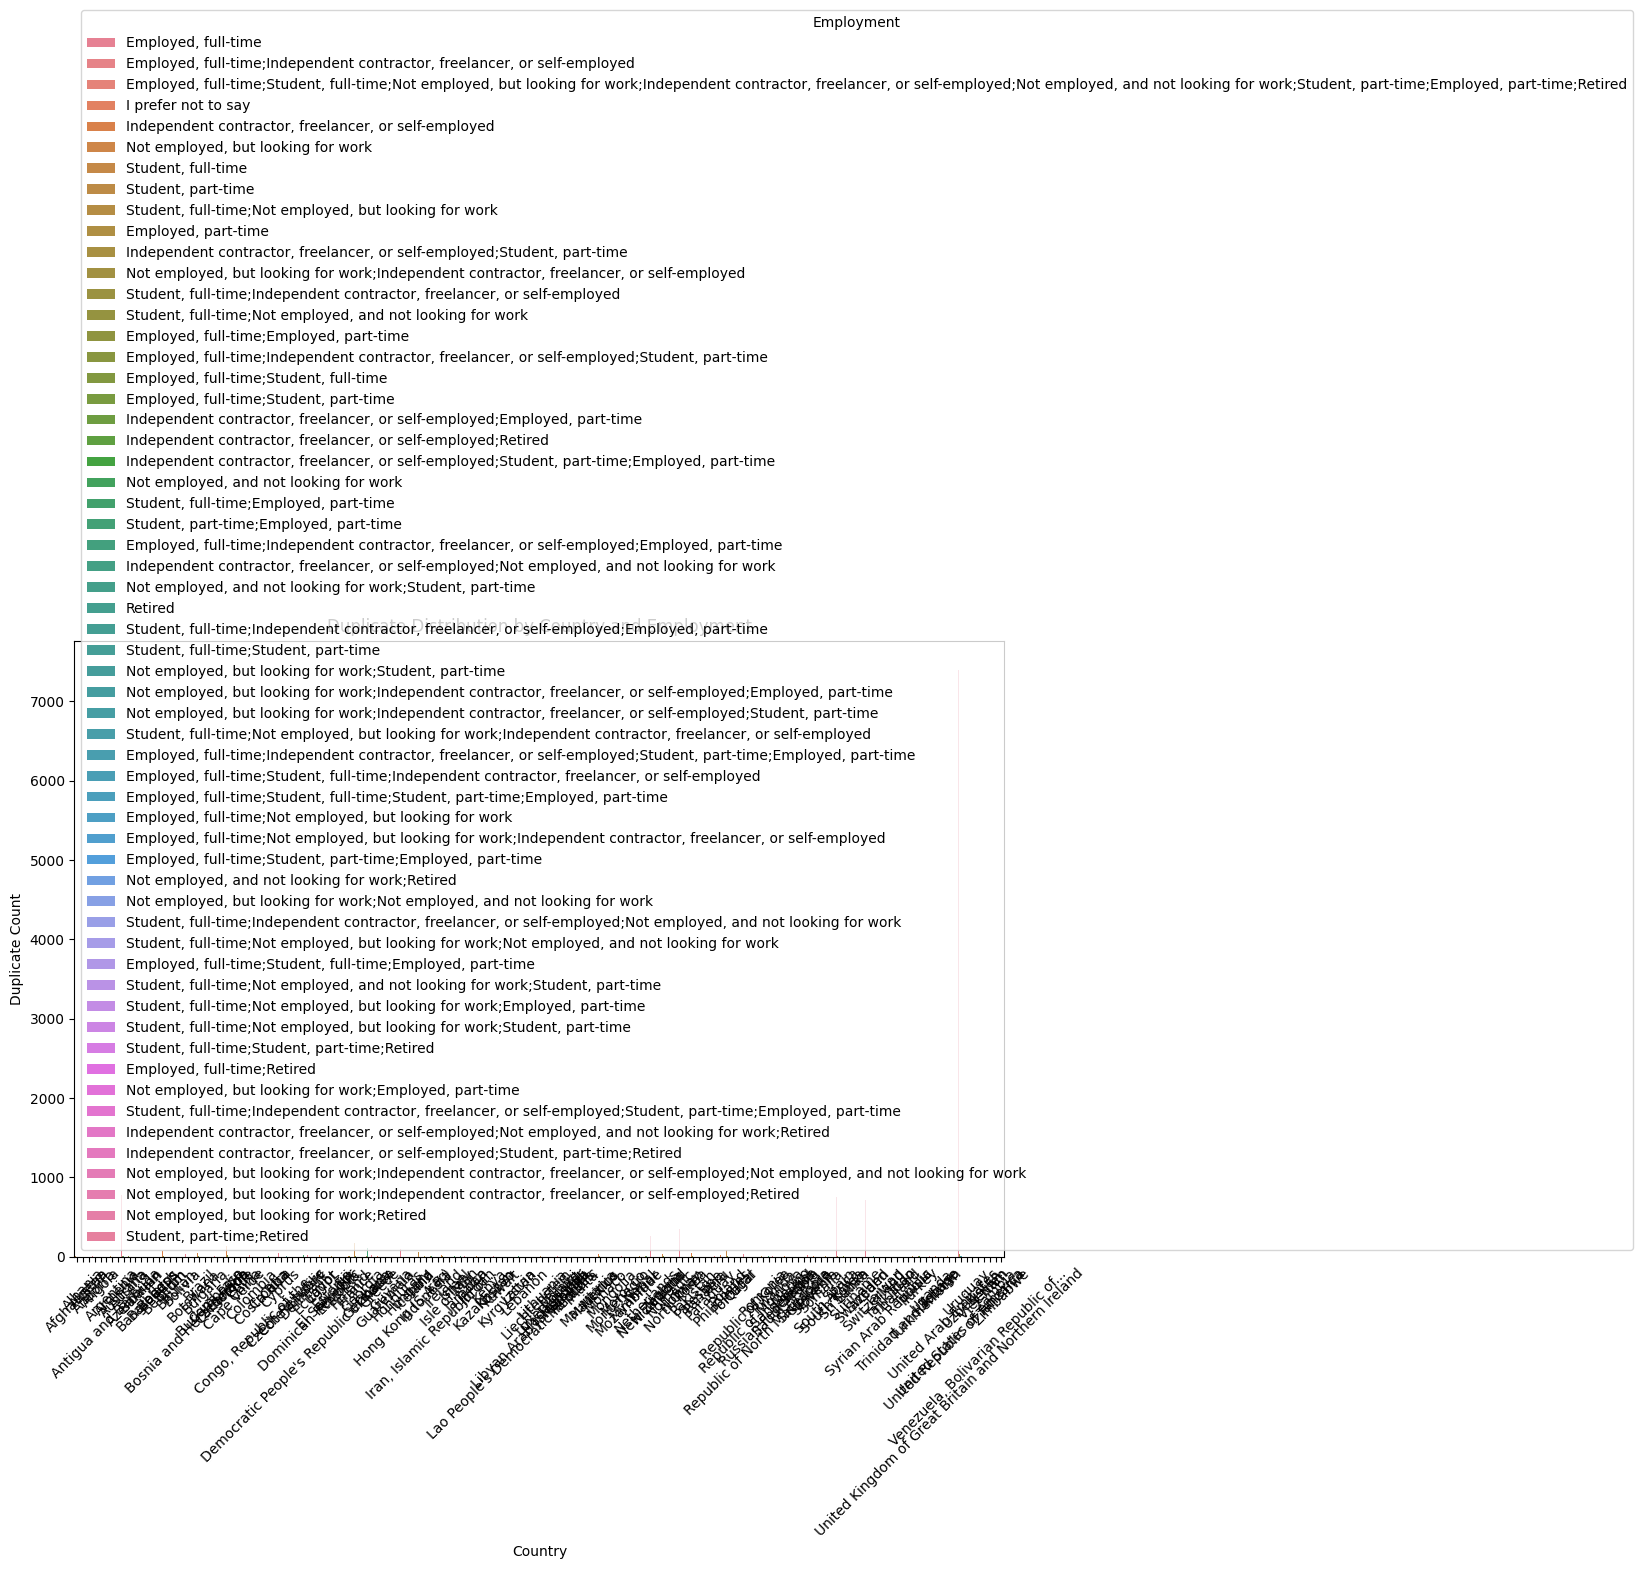

In [20]:
## Write your code here
selected_columns1 = ['Country', 'Employment']
duplicate_mask1 = df.duplicated(subset=selected_columns1, keep=False)
duplicate_df1 = df[duplicate_mask1]

duplicates_count = duplicate_df1.groupby(['Country', 'Employment']).size().reset_index(name='DuplicateCount')

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Country', y='DuplicateCount', hue='Employment', data=duplicates_count)

plt.title('Duplicate Distribution by Country and Employment')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Duplicate Count')

plt.legend(title='Employment')

plt.tight_layout()
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [21]:
## Write your code here
selected_columns2 = ['ResponseId','MainBranch', 'Employment', 'RemoteWork']
df.drop_duplicates(subset=selected_columns2 ,inplace=True)

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
